# Librerias Necesarias

In [48]:
from IPython import get_ipython
get_ipython().run_line_magic('reset','-f')
get_ipython().run_line_magic('clear','-f')
#clean environment and command line

In [49]:
import os
import pandas as pd
import statsmodels.api as sm
import numpy as np
import random
import pylab as pl
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
import pylab as pl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Vamos a comprobar el directorio de trabajo para poder cargar los datos necesaris para resolver los problemas:

In [50]:
#check my current working directory
#os.getcwd()

# Ejercicio 1 (data_mvn.txt)

In [51]:
#cargar los datos
df = pd.read_csv('data/data_mvn.txt', delimiter='\t')

In [52]:
#create X with all variables but column Y
X = df.drop(columns=['Y'], axis=1).values
n,p = df.shape
p = p-1
X = sm.add_constant(X) #add intercept
Y = df['Y'].values

In [53]:
#fijamos un seed para la generación de números aleatorios
random.seed(100)

In [54]:
# split data into TRAIN, TEST and VALIDATION with 50% for test size:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

### Linear model with all variables

In [55]:
#linear model with all variables
model_fit = sm.OLS(Y_train, X_train).fit()
ypred = model_fit.predict(X_train)
print("RMSE:", rmse(Y_train, ypred))

RMSE: 3.6039135486812457


In [56]:
#prediction and rmse with test data
ypred_test = model_fit.predict(X_test)
print("RMSE test:", rmse(Y_test, ypred_test))

RMSE test: 5.286218715384649


El comportamiento en el train y en el test no es igual. Como era de esperar, en el test el resultado es peor.

In [57]:
rmse_train = rmse(Y_train, ypred)
rmse_test = rmse(Y_test, ypred_test)
print("RMSE train:", rmse_train)
print("RMSE test:", rmse_test)

RMSE train: 3.6039135486812457
RMSE test: 5.286218715384649


### Individual linear models

En este apartado vamos a construir un modelo considerando las primeras k variables. Es decir, si k=1 (solo una variable), con k=2 (las dos primeras variables)

In [58]:
rmse_train  = np.zeros(p+1)
rmse_test = np.zeros(p+1)
length = range(0,p+1)

In [59]:
k = 1
while (k <= (p+1)):
    Xk_train = X_train[:,:k]
    Xk_test = X_test[:,:k]
    model_L = sm.OLS(Y_train, Xk_train)
    model_fit = model_L.fit()
    ypred = model_fit.predict(Xk_train)
    rmse_train[k-1] = rmse(Y_train, ypred)
    ypred = model_fit.predict(Xk_test)
    rmse_test[k-1] = rmse(Y_test, ypred)
    k = k +1


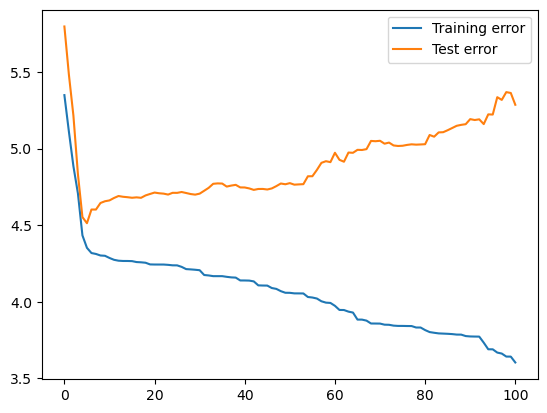

In [60]:
pl.clf()
pl.plot(length, rmse_train, label = 'Training error')
pl.plot(length, rmse_test, label = 'Test error')
pl.legend()
pl.show()

### Modelo lineal con AIC y BIC

In [61]:
AIC = np.zeros(p+1)
BIC = np.zeros(p+1)
k = 1

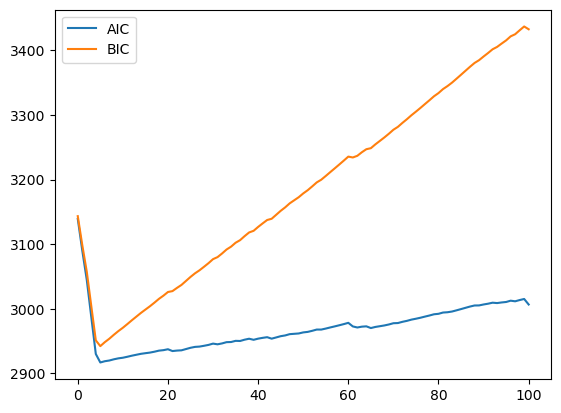

In [62]:
while (k <= (p+1)):
    Xk = X[:,:k]
    model_L = sm.OLS(Y, Xk)
    model_fit = model_L.fit()
    AIC[k-1] = model_fit.aic
    BIC[k-1] = model_fit.bic
    k = k +1
    
pl.clf()
pl.plot(length, AIC, label = 'AIC')
pl.plot(length, BIC, label = 'BIC')
pl.legend()
pl.show()

### cross-validation

In [63]:
CV = np.zeros(p+1)
k = 1
lm = LinearRegression()

In [64]:
while (k <= (p+1)):
    Xk = X_train[:,:k]
    scores = -cross_val_score(lm, Xk, Y_train,
                         scoring='neg_root_mean_squared_error', cv=5)
    CV[k-1] = np.mean(scores)
    k = k +1


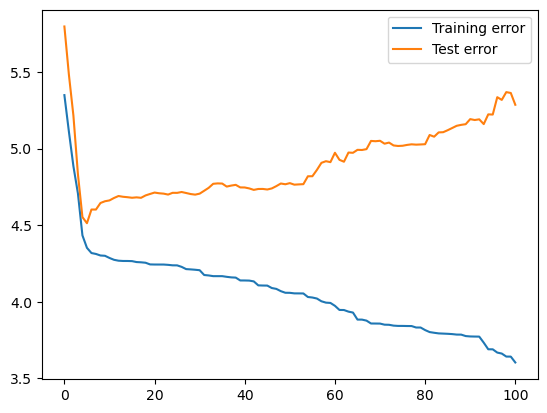

In [65]:

pl.clf()
pl.plot(length, rmse_train, label = 'Training error')
pl.plot(length, rmse_test, label = 'Test error')
pl.legend()
pl.show()


In [66]:
# Select the optimal K   
min_value = min(CV)
min_index = np.where(CV==min_value)
K = np.ndarray.item(min_index[0])+1
 
X_train_k = X_train[:,:K]
X_test_k = X_test[:,:K]


In [67]:
model_L = sm.OLS(Y_train, X_train_k)
model_fit = model_L.fit()
ypred = model_fit.predict(X_train_k)
rmse_train = rmse(Y_train, ypred)

ypred = model_fit.predict(X_test_k)
rmse_test = rmse(Y_test, ypred)

print("Optimal number of variables is: ", K)
print("RMSE in training error is: ", rmse_train)
print("RMSE in test error is: ", rmse_test)


Optimal number of variables is:  7
RMSE in training error is:  4.318345805818764
RMSE in test error is:  4.602401499503415
